<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D0%B7%D0%BC%D1%8B%D1%82%D0%B8%D0%B5_%D0%B8_%D0%B0%D0%BD%D0%BE%D0%BD%D0%B8%D0%BC%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BB%D0%B8%D1%86_%D1%81_OpenCV_%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Размытие и анонимность лиц с OpenCV и Python

# Face blur and anonymity with OpenCV and Python 

В этом уроке вы узнаете, как размыть и анонимизировать лица с помощью OpenCV и Python.



In this tutorial, you will learn how to blur and anonymize faces using OpenCV and Python.




Размытие лиц - это метод компьютерного зрения, используемый для анонимности лиц на изображениях и видео.

Face blur is a computer vision technique used to anonymize faces in images and videos.



### 4 шага для размытия лица и анонимности

### 4 steps to blur face and anonymity


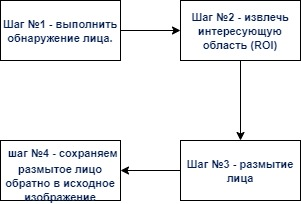


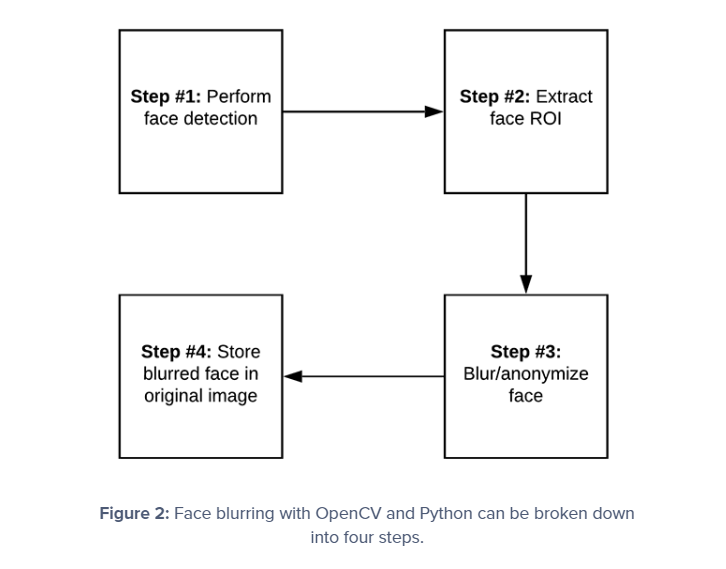


Существует два метода размытия лица с помощью OpenCV:

There are two methods of blurring a face with OpenCV:


* Размытие лиц с помощью гауссовского шума. Blurring faces with Gaussian noise
* Применение эффекта «пиксельного размытия». Applying the "pixel blur" effect 

### Загрузка файлов
### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_34.opencv_face_blurring.zip
!unzip -qq Lesson_34.opencv_face_blurring.zip
%cd /content/Lesson_34.opencv_face_blurring/

--2022-02-20 09:44:34--  http://dataudt.ru/datasets/cv/Lesson_34.opencv_face_blurring.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31911763 (30M) [application/zip]
Saving to: ‘Lesson_34.opencv_face_blurring.zip’

Lesson_34.opencv_fa 100%[===================>]  30.43M  5.91MB/s    in 5.2s    

2022-02-20 09:44:40 (5.91 MB/s) - ‘Lesson_34.opencv_face_blurring.zip’ saved [31911763/31911763]

/content/Lesson_34.opencv_face_blurring


### Импорт библиотек
### Import Packages

In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import os

### Функция отображения изображений в Jupyter Notebooks и Google Colab 
### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10, 10))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Размытие лиц с помощью гауссовского шума
### Blurring faces with a Gaussian blur and OpenCV

In [4]:
def anonymize_face_simple(image, factor=3.0):
    # автоматически определяем размер ядра размытия на основе
	# пространственных размеров входного изображения
	# automatically determine the size of the blurring kernel based
	# on the spatial dimensions of the input image
	(h, w) = image.shape[:2]
	kW = int(w / factor)
	kH = int(h / factor)

    # убеждаемся, что ширина ядра нечетная
	# ensure the width of the kernel is odd
	if kW % 2 == 0:
		kW -= 1

    # убеждаемся, что высота ядра нечетная
	# ensure the height of the kernel is odd
	if kH % 2 == 0:
		kH -= 1

    # применяем гауссовское размытие к входному изображению, используя наши вычисленный
	# размер ядра
	# apply a Gaussian blur to the input image using our computed
	# kernel size
	return cv2.GaussianBlur(image, (kW, kH), 0)

### Создание пиксельного размытия лица
### Creating a pixelated face blur with OpenCV

In [5]:
def anonymize_face_pixelate(image, blocks=3):
    # делим входное изображение на NxN блоков
	# divide the input image into NxN blocks
	(h, w) = image.shape[:2]
	xSteps = np.linspace(0, w, blocks + 1, dtype="int")
	ySteps = np.linspace(0, h, blocks + 1, dtype="int")

    # перебираем блоки как по оси x, так и по оси y
	# loop over the blocks in both the x and y direction
	for i in range(1, len(ySteps)):
		for j in range(1, len(xSteps)):
            # вычисляем начальную и конечную (x, y) -координаты
			# для текущего блока
			# compute the starting and ending (x, y)-coordinates
			# for the current block
			startX = xSteps[j - 1]
			startY = ySteps[i - 1]
			endX = xSteps[j]
			endY = ySteps[i]

            # извлекаем ROI с помощью срезов массива NumPy, вычисляем
			# среднее значение ROI, а затем нарисуем прямоугольник со
			# средним значенией RGB по ROI в исходном изображении
			# extract the ROI using NumPy array slicing, compute the
			# mean of the ROI, and then draw a rectangle with the
			# mean RGB values over the ROI in the original image
			roi = image[startY:endY, startX:endX]
			(B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
			cv2.rectangle(image, (startX, startY), (endX, endY),
				(B, G, R), -1)

    # возвращаем пиксельное размытое изображение
	# return the pixelated blurred image
	return image

### Реализация размытия лица на изображениях с помощью OpenCV
### Implementing face blurring in images with OpenCV

In [10]:

# явно укажем аргументы необходимые для работы
# image - путь к входному изображению
# face - путь к каталогу модели детектора лиц
# method - метод размытия/анонимизации лица
# blocks - количество блоков для метода пиксельного размытия
# confidence - минимальная вероятность для фильтрации слабых обнаружений

# explicitly specify the arguments needed to work
# image - path to input image
# face - path to face detector model directory
# method - face blurring/anonymizing method
# blocks - # of blocks for the pixelated blurring method
# confidence - minimum probability to filter weak detections
args = {
    "image": "examples/5.jpg",
    "face": "face_detector",
    "method": "pixelated",
    "blocks": 20,
    "confidence": 0.5

}

In [11]:
# загружаем нашу сохраненную модель детектора лиц с диска
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

# загружаем входное изображение с диска, копируем его и определяем размеры изображения
# load the input image from disk, clone it, and grab the image spatial
# dimensions
image = cv2.imread(args["image"])
orig = image.copy()
(h, w) = image.shape[:2]

# создаем заготовку из изображения
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

# передаем заготовку сети и получаем распознавание лиц
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] loading face detector model...
[INFO] computing face detections...


In [12]:
# перебираем все распознанные лица
# loop over the detections
for i in range(0, detections.shape[2]):
    # извлекаем уверенность (т.е. вероятность), связанную с обнаружением
	# extract the confidence (i.e., probability) associated with the
	# detection
	confidence = detections[0, 0, i, 2]

    # отфильтруем слабые обнаружения, убедившись, что их вероятность
	# меньше минимальной
	# filter out weak detections by ensuring the confidence is greater
	# than the minimum confidence
	if confidence > args["confidence"]:
        # вычислим (x, y)-координаты ограничивающей рамки объекта
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

        # извлекаем ROI лица
		# extract the face ROI
		face = image[startY:endY, startX:endX]

        # проверяем, применяем ли мы "простой" метод размытия лица
        # check to see if we are applying the "simple" face blurring
		# method
		if args["method"] == "simple":
			face = anonymize_face_simple(face, factor=3.0)

        # в противном случае, мы применяем "пиксельный" метод размытия лица
		# otherwise, we must be applying the "pixelated" face
		# anonymization method
		else:
			face = anonymize_face_pixelate(face,
				blocks=args["blocks"])

        # сохраняем размытое лицо в выходном изображении
		# store the blurred face in the output image
		image[startY:endY, startX:endX] = face

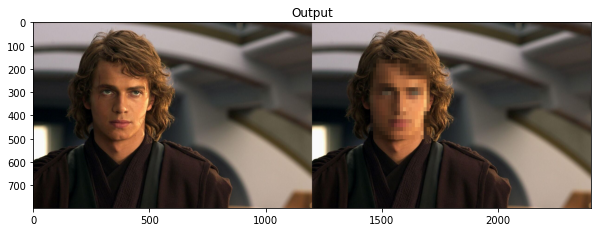

In [13]:
# отображаем рядом исходное изображение и выходное изображение с размытым лицом
# display the original image and the output image with the blurred
# face(s) side by side
output = np.hstack([orig, image])
plt_imshow("Output", output)

### Реализация размытия лица в видео в реальном времени с помощью OpenCV

### Implementing face blurring in real-time video with OpenCV

In [14]:
# явно укажем аргументы необходимые для работы
# вход - входное видео 
# output - выходное видео 
# face - путь к каталогу модели детектора лиц
# метод - метод размытия/анонимизации лица
# блоки - количество блоков для метода пиксельного размытия
# confidence - минимальная вероятность для фильтрации слабых обнаружений

# explicitly specify the arguments needed to work
# input - input video 
# output - output video 
# face - path to face detector model directory
# method - face blurring/anonymizing method
# blocks - # of blocks for the pixelated blurring method
# confidence - minimum probability to filter weak detections
args = {
    "input": "video.mp4",
    "output": "output.avi",
    "face": "face_detector",
    "method": "simple",
    "blocks": 20,
    "confidence": 0.5
}

In [15]:
# загружаем нашу сохраненную модель детектора лиц с диска
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

# находим ссылку на видеофайл и инициализируем путь к выходному видеофайлу
# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector model...
[INFO] opening video file...


In [16]:
# перебираем кадры из видео
# loop over the frames from the video stream
while True:
    # берем кадр из нашего видео
	# grab the next frame
	frame = vs.read()[1]

    # если кадр не был захвачен, то мы дошли до конца видео
	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break

    # изменим размер кадра, чтобы его максимальная ширина составляла 400 пикселей
	# resize the frame to have a maximum width of 400 pixels
	frame = imutils.resize(frame, width=400)

    # возьмем размеры кадра и затем создадим из кадра заготовку
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

    # передаем заготовку сети и получаем распознанные лица
	# pass the blob through the network and obtain the face detections
	net.setInput(blob)
	detections = net.forward()

    # перебираем распознанные лица
    # loop over the detections
	for i in range(0, detections.shape[2]):
        # извлекаем уверенность (т.е. вероятность), связанную с обнаружением
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

        # отфильтруем слабые обнаружения, убедившись, что их вероятность
		# меньше минимальной
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > args["confidence"]:
            # вычислим (x, y)-координаты ограничивающей рамки объекта
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

            # извлекаем ROI лица
			# extract the face ROI
			face = frame[startY:endY, startX:endX]

            # проверяем, применяем ли мы "простой" метод размытия лица
			# check to see if we are applying the "simple" face
			# blurring method
			if args["method"] == "simple":
				face = anonymize_face_simple(face, factor=3.0)

            # в противном случае, мы применяем "пиксельный" метод размытия лица
			# otherwise, we must be applying the "pixelated" face
			# anonymization method
			else:
				face = anonymize_face_pixelate(face,
					blocks=args["blocks"])

            # сохраняем размытое лицо в выходном изображении
			# store the blurred face in the output image
			frame[startY:endY, startX:endX] = face

    # если нет видеокамеры  *и* мы должны записать
    # выходное видео на диск, то инициализируем камеру
    # if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
    # если камера работает, записываем кадр на диск
	# if the writer is not None, write the frame with recognized
	# faces to disk
	if writer is not None:
		writer.write(frame)

# очищаем данные
# do a bit of cleanup
vs.release()

# проверьте, нужно ли выключить камеру
# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

Выполнение ячейки может занять некоторое время. Наше выходное видео создается в формате .avi. Нам нужно преобразовать его в формат .mp4.


The execution of the cell may take some time. Our output video is created in .avi format. We need to convert it to .mp4 format.

In [17]:
!ffmpeg -i output.avi output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [18]:
#@title Воспроизводим выходное видео

#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)